<a href="https://colab.research.google.com/github/Tejasaisathwik/-I/blob/main/xtrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
dt = pd.read_csv('/parota.csv')

In [ ]:
dt

,House No.,Square Feet,Location,Rooms,Flats,Windows,Amount ($)
0,1,1200,Downtown,3,1,8,"250,000"
1,2,2000,Suburban Area,4,2,10,"350,000"
2,3,950,Lakeside,2,1,6,"180,000"
3,4,1500,Urban Center,3,1,9,"280,000"
4,5,1800,Hilltop,4,2,12,"330,000"
...,...,...,...,...,...,...,...
94,95,1400,Hilltop,3,1,7,"240,000"
95,96,1800,Downtown,4,2,10,"320,000"
96,97,2000,Suburban Area,4,2,11,"340,000"
97,98,2100,Lakeside,4,2,12,"350,000"


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   House No.    99 non-null     int64 
 1   Square Feet  99 non-null     int64 
 2   Location     99 non-null     object
 3   Rooms        99 non-null     int64 
 4   Flats        99 non-null     int64 
 5   Windows      99 non-null     int64 
 6   Amount ($)   99 non-null     object
dtypes: int64(5), object(2)
memory usage: 5.5+ KB


In [ ]:
dt['Amount ($)'].unique()

array(['250,000', '350,000', '180,000', '280,000', '330,000', '275,000',
       '240,000', '400,000', '320,000', '200,000', '300,000', '360,000',
       '230,000', '290,000', '270,000', '310,000', '380,000', '220,000',
       '260,000', '340,000', '210,000', '390,000', '370,000'],
      dtype=object)

In [ ]:
  from sklearn.preprocessing import LabelEncoder

In [ ]:
l = LabelEncoder()

In [ ]:
dt['Amount ($)'] = l.fit_transform(dt['Amount ($)'])

In [ ]:
dt['Amount ($)'].unique()

array([ 6, 17,  0, 10, 15,  9,  5, 22, 14,  1, 12, 18,  4, 11,  8, 13, 20,
        3,  7, 16,  2, 21, 19])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = dt.drop(['Location','House No.','Flats'],axis=1)

In [ ]:
y = dt['Flats']

In [ ]:
x

,Square Feet,Rooms,Windows,Amount ($)
0,1200,3,8,6
1,2000,4,10,17
2,950,2,6,0
3,1500,3,9,10
4,1800,4,12,15
...,...,...,...,...
94,1400,3,7,5
95,1800,4,10,14
96,2000,4,11,16
97,2100,4,12,17


In [ ]:
x = dt.drop(['Location','House No.','Flats','Square Feet'],axis=1)

In [ ]:
x

,Rooms,Windows,Amount ($)
0,3,8,6
1,4,10,17
2,2,6,0
3,3,9,10
4,4,12,15
...,...,...,...
94,3,7,5
95,4,10,14
96,4,11,16
97,4,12,17


In [ ]:
dt.corr(numeric_only=True)

,House No.,Square Feet,Rooms,Flats,Windows,Amount ($)
House No.,1.000000,0.103281,0.047870,0.128012,0.075410,-0.011686
Square Feet,0.103281,1.000000,0.862832,0.688576,0.895249,0.955370
Rooms,0.047870,0.862832,1.000000,0.603478,0.881032,0.913315
Flats,0.128012,0.688576,0.603478,1.000000,0.733046,0.729667
Windows,0.075410,0.895249,0.881032,0.733046,1.000000,0.935907
Amount ($),-0.011686,0.955370,0.913315,0.729667,0.935907,1.000000


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25)

In [ ]:
xtest

,Rooms,Windows,Amount ($)
28,5,13,20
3,3,9,10
89,4,12,13
16,3,8,5
27,4,11,14
46,4,11,13
33,4,12,17
93,3,9,10
44,3,10,10
19,2,7,3


In [ ]:
ytest

,Flats
28,2
3,1
89,2
16,1
27,2
46,2
33,2
93,2
44,2
19,1


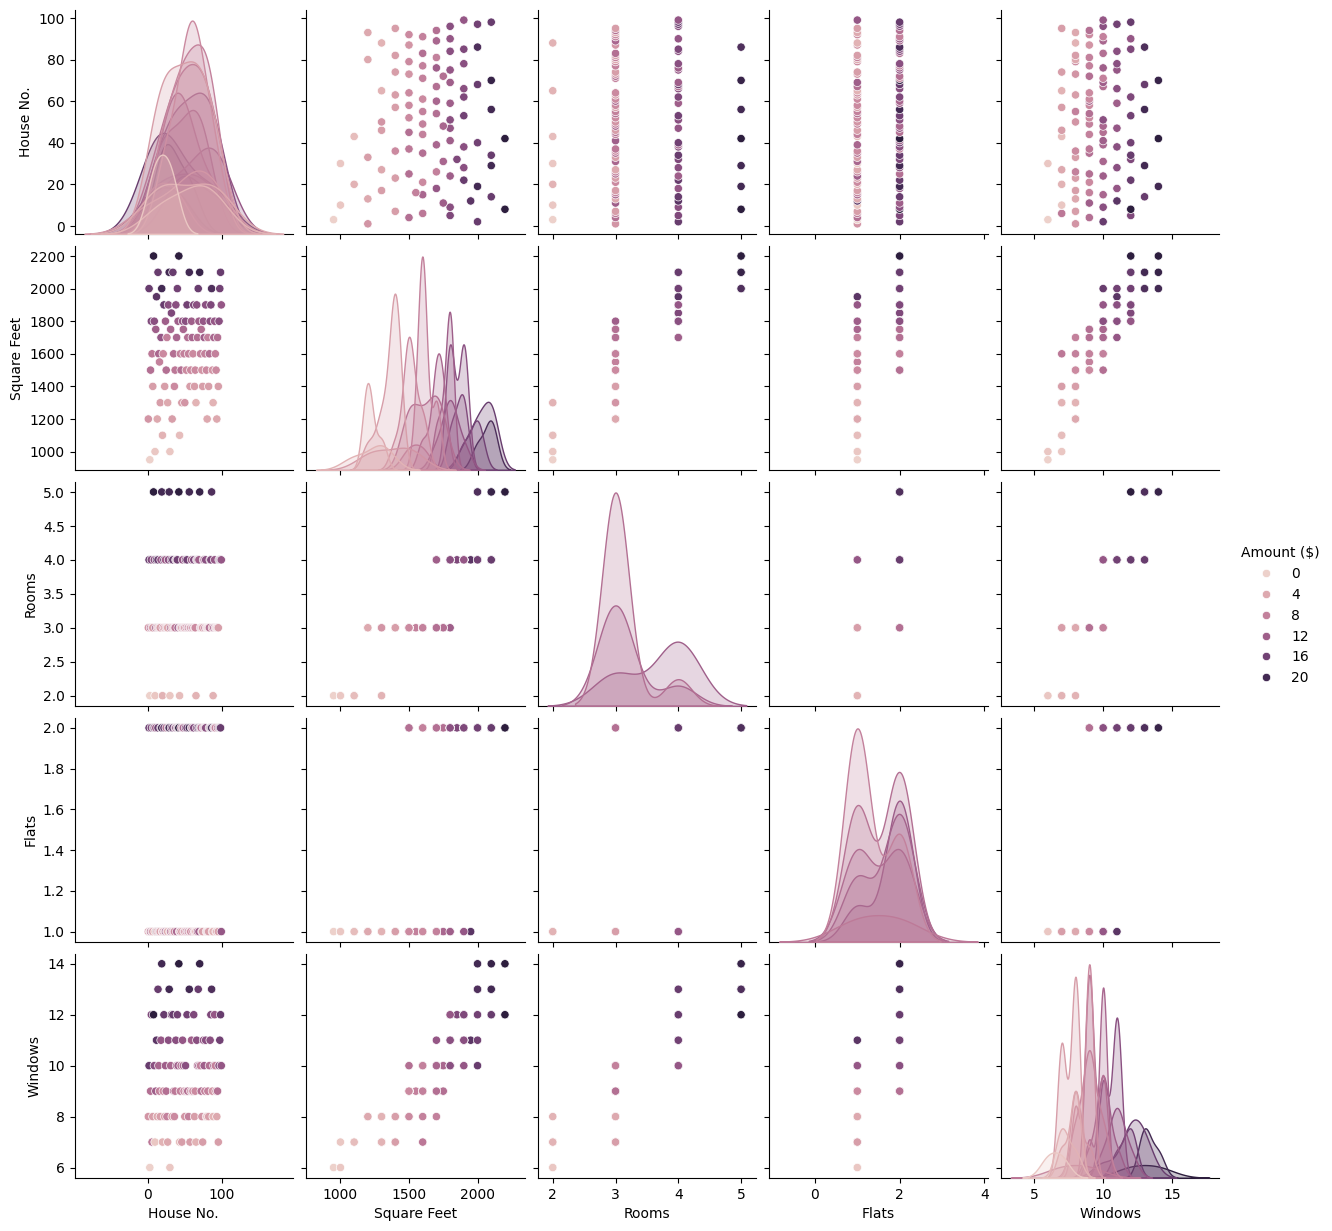

In [ ]:
sns.pairplot(dt, hue='Amount ($)')

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(xtrain, ytrain)

LogisticRegression()

In [ ]:
ypred = lr.predict(xtest)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(ytest, ypred)

0.92

In [ ]:
import pickle

In [ ]:
pickle.dump(lr, open('parota.pkl','wb'))